In [62]:
#source("https://bioconductor.org/biocLite.R")
#biocLite()
#biocLite("edgeR")
#biocLite("limma")
#install.packages("RColorBrewer")
#install.packages("gplots")

Installing package into ‘/home/ryan/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
also installing the dependencies ‘gtools’, ‘gdata’, ‘caTools’



In [2]:
library(edgeR)
library(limma)

Loading required package: limma


In [32]:
genes_rsem <- read.csv("GSE106647_gene_counts.txt", stringsAsFactors = F, sep="\t")
dim(genes_rsem)
colnames(genes_rsem)
head(genes_rsem)

[1] 17499    25

[1] "Gene_Name"              "Counts_N2_1"            "Counts_N2_2"           
 [4] "Counts_N2_3"            "Counts_N2_4"            "Counts_adr_1"          
 [7] "Counts_adr_2"           "Counts_adr_3"           "Counts_adr_4"          
[10] "Counts_adr_rrf3_1"      "Counts_adr_rrf3_2"      "Counts_adr_rrf3_3"     
[13] "Counts_adr_rrf3_4"      "Counts_adr_rrf3_rde1_1" "Counts_adr_rrf3_rde1_2"
[16] "Counts_adr_rrf3_rde1_3" "Counts_adr_rrf3_rde1_4" "Counts_adr_rrf3_rde4_1"
[19] "Counts_adr_rrf3_rde4_2" "Counts_adr_rrf3_rde4_3" "Counts_adr_rrf3_rde4_4"
[22] "Counts_rrf3_1"          "Counts_rrf3_2"          "Counts_rrf3_3"         
[25] "Counts_rrf3_4"

Gene_Name,Counts_N2_1,Counts_N2_2,Counts_N2_3,Counts_N2_4,Counts_adr_1,Counts_adr_2,Counts_adr_3,Counts_adr_4,Counts_adr_rrf3_1,⋯,Counts_adr_rrf3_rde1_3,Counts_adr_rrf3_rde1_4,Counts_adr_rrf3_rde4_1,Counts_adr_rrf3_rde4_2,Counts_adr_rrf3_rde4_3,Counts_adr_rrf3_rde4_4,Counts_rrf3_1,Counts_rrf3_2,Counts_rrf3_3,Counts_rrf3_4
EGAP1.3,183,32,86,112,187,109,167,111,335,⋯,375,198,285,178,329,157,184,123,264,172
F47H4.2,119,33,46,30,88,35,50,60,202,⋯,289,98,206,49,157,49,96,48,166,101
Y75B8A.35,579,160,544,449,682,463,642,377,559,⋯,922,528,745,405,704,449,550,594,569,600
C49G7.10,452,92,21,90,132,167,46,140,1345,⋯,1767,307,1108,148,835,190,500,186,1153,641
B0365.6,907,72,238,175,554,143,251,133,1357,⋯,2547,573,1901,413,1370,342,725,446,1757,1003
Y105C5A.13,67,4,5,10,24,1,12,14,102,⋯,242,43,76,18,101,19,47,28,125,80


In [33]:
counts_matrix <- genes_rsem[,2:25]
rownames(counts_matrix) <- genes_rsem[,1]
head(counts_matrix)

,Counts_N2_1,Counts_N2_2,Counts_N2_3,Counts_N2_4,Counts_adr_1,Counts_adr_2,Counts_adr_3,Counts_adr_4,Counts_adr_rrf3_1,Counts_adr_rrf3_2,⋯,Counts_adr_rrf3_rde1_3,Counts_adr_rrf3_rde1_4,Counts_adr_rrf3_rde4_1,Counts_adr_rrf3_rde4_2,Counts_adr_rrf3_rde4_3,Counts_adr_rrf3_rde4_4,Counts_rrf3_1,Counts_rrf3_2,Counts_rrf3_3,Counts_rrf3_4
EGAP1.3,183,32,86,112,187,109,167,111,335,235,⋯,375,198,285,178,329,157,184,123,264,172
F47H4.2,119,33,46,30,88,35,50,60,202,141,⋯,289,98,206,49,157,49,96,48,166,101
Y75B8A.35,579,160,544,449,682,463,642,377,559,601,⋯,922,528,745,405,704,449,550,594,569,600
C49G7.10,452,92,21,90,132,167,46,140,1345,451,⋯,1767,307,1108,148,835,190,500,186,1153,641
B0365.6,907,72,238,175,554,143,251,133,1357,732,⋯,2547,573,1901,413,1370,342,725,446,1757,1003
Y105C5A.13,67,4,5,10,24,1,12,14,102,53,⋯,242,43,76,18,101,19,47,28,125,80


In [34]:
x <- DGEList(counts=counts_matrix, genes = row.names(counts_matrix))
class(x)
x

[1] "DGEList"
attr(,"package")
[1] "edgeR"

,Counts_N2_1,Counts_N2_2,Counts_N2_3,Counts_N2_4,Counts_adr_1,Counts_adr_2,Counts_adr_3,Counts_adr_4,Counts_adr_rrf3_1,Counts_adr_rrf3_2,⋯,Counts_adr_rrf3_rde1_3,Counts_adr_rrf3_rde1_4,Counts_adr_rrf3_rde4_1,Counts_adr_rrf3_rde4_2,Counts_adr_rrf3_rde4_3,Counts_adr_rrf3_rde4_4,Counts_rrf3_1,Counts_rrf3_2,Counts_rrf3_3,Counts_rrf3_4
EGAP1.3,183,32,86,112,187,109,167,111,335,235,⋯,375,198,285,178,329,157,184,123,264,172
F47H4.2,119,33,46,30,88,35,50,60,202,141,⋯,289,98,206,49,157,49,96,48,166,101
Y75B8A.35,579,160,544,449,682,463,642,377,559,601,⋯,922,528,745,405,704,449,550,594,569,600
C49G7.10,452,92,21,90,132,167,46,140,1345,451,⋯,1767,307,1108,148,835,190,500,186,1153,641
B0365.6,907,72,238,175,554,143,251,133,1357,732,⋯,2547,573,1901,413,1370,342,725,446,1757,1003
Y105C5A.13,67,4,5,10,24,1,12,14,102,53,⋯,242,43,76,18,101,19,47,28,125,80
Y17D7B.4,75,19,99,51,91,42,91,29,629,533,⋯,1289,542,853,367,937,528,546,492,821,806
Y51F10.4,1111,1296,1288,1582,819,599,782,610,626,549,⋯,817,556,722,581,661,575,1282,1131,1011,1126
T12B5.8,158,52,179,147,173,119,182,79,567,404,⋯,914,368,655,248,534,362,472,481,646,540
Y82E9BR.18,1220,1532,1295,1707,934,794,852,846,566,736,⋯,738,637,1001,1032,940,954,1410,1306,1067,1051


In [35]:
samplenames <- gsub("Counts_","",colnames(x))
colnames(x) <- samplenames
colnames(x)

[1] "N2_1"            "N2_2"            "N2_3"            "N2_4"           
 [5] "adr_1"           "adr_2"           "adr_3"           "adr_4"          
 [9] "adr_rrf3_1"      "adr_rrf3_2"      "adr_rrf3_3"      "adr_rrf3_4"     
[13] "adr_rrf3_rde1_1" "adr_rrf3_rde1_2" "adr_rrf3_rde1_3" "adr_rrf3_rde1_4"
[17] "adr_rrf3_rde4_1" "adr_rrf3_rde4_2" "adr_rrf3_rde4_3" "adr_rrf3_rde4_4"
[21] "rrf3_1"          "rrf3_2"          "rrf3_3"          "rrf3_4"

In [36]:
group <- as.factor(rep(c("N2","adr","adr_rrf3","adr_rrf3_rde1","adr_rrf3_rde4","rrf3"),c(4,4,4,4,4,4)))
x$samples$group <- group
x$samples

,group,lib.size,norm.factors
N2_1,N2,23267776,1
N2_2,N2,21418271,1
N2_3,N2,24985897,1
N2_4,N2,28938874,1
adr_1,adr,25083555,1
adr_2,adr,20922644,1
adr_3,adr,24994350,1
adr_4,adr,21194977,1
adr_rrf3_1,adr_rrf3,20951759,1
adr_rrf3_2,adr_rrf3,21674226,1


In [37]:
cpm <- cpm(x)
lcpm <- cpm(x,log=T)
head(cpm)

,N2_1,N2_2,N2_3,N2_4,adr_1,adr_2,adr_3,adr_4,adr_rrf3_1,adr_rrf3_2,⋯,adr_rrf3_rde1_3,adr_rrf3_rde1_4,adr_rrf3_rde4_1,adr_rrf3_rde4_2,adr_rrf3_rde4_3,adr_rrf3_rde4_4,rrf3_1,rrf3_2,rrf3_3,rrf3_4
EGAP1.3,7.864955,1.4940515,3.4419417,3.8702266,7.4550836,5.20966662,6.6815100,5.2370899,15.989111,10.842371,⋯,14.354161,10.312020,11.992399,8.3783887,14.767158,7.3896524,7.296823,5.640665,12.537750,7.256224
F47H4.2,5.114369,1.5407406,1.8410386,1.0366678,3.5082746,1.67282873,2.0004521,2.8308594,9.641195,6.505423,⋯,11.062273,5.103929,8.668190,2.3064104,7.046942,2.3063246,3.807038,2.201235,7.883585,4.260922
Y75B8A.35,24.884200,7.4702575,21.7722822,15.5154620,27.1891285,22.12913435,25.6858050,17.7872333,26.680337,27.728787,⋯,35.292097,27.498721,31.348552,19.0631879,31.599026,21.1334644,21.811155,27.240285,27.022651,25.312409
C49G7.10,19.426008,4.2953981,0.8404741,3.1100035,5.2624120,7.98178280,1.8404159,6.6053386,64.195087,20.808125,⋯,67.636806,15.988840,46.623081,6.9663008,37.478958,8.9428914,19.828322,8.529786,54.757675,27.042090
B0365.6,38.980949,3.3616159,9.5253735,6.0472291,22.0861836,6.83470024,10.0422696,6.2750717,64.767832,33.772832,⋯,97.493461,29.842362,79.991406,19.4397447,61.492422,16.0972045,28.751068,20.453144,83.442528,42.313910
Y105C5A.13,2.879519,0.1867564,0.2001129,0.3455559,0.9568022,0.04779511,0.4801085,0.6605339,4.868326,2.445301,⋯,9.263219,2.239479,3.197973,0.8472528,4.533383,0.8942891,1.863862,1.284054,5.936435,3.374988


In [38]:
dim(x)
table(rowSums(x$counts==0)==24)

[1] 17499    24


FALSE 
17499 

In [39]:
keep.exprs <- rowSums(cpm>1)>=4
x <- x[keep.exprs,, keep.lib.sizes=F]
dim(x)

[1] 14767    24

Warning message in brewer.pal(nsamples, "Paired"):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"ity" is not a graphical parameter”

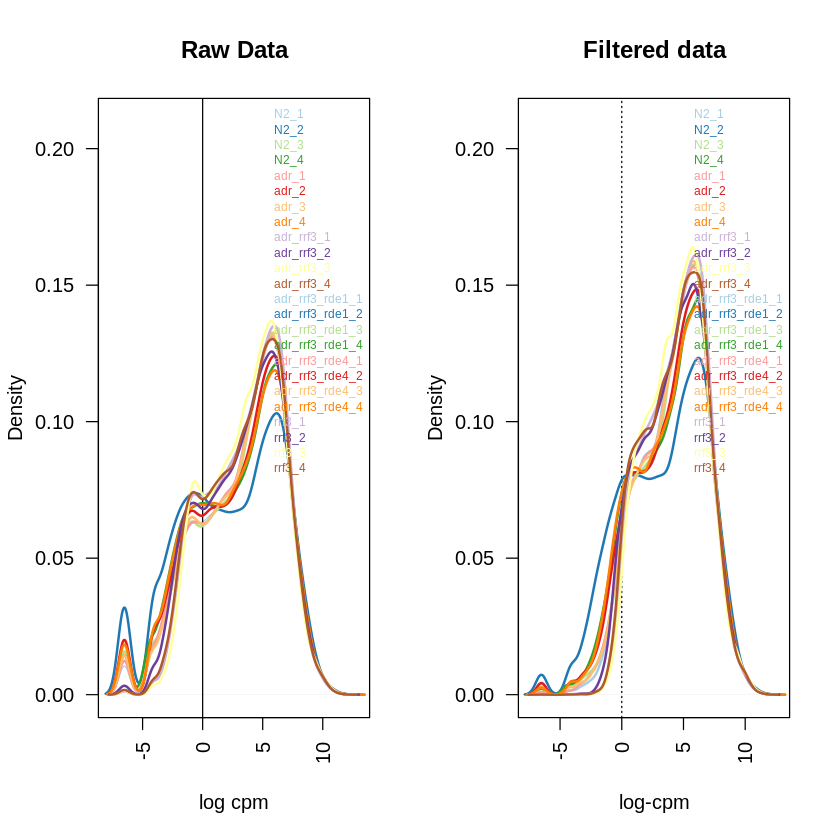

In [43]:
library(RColorBrewer)
nsamples <- ncol(x)
col <- brewer.pal(nsamples, 'Paired')
par(mfrow=c(1,2))
plot(density(lcpm[,1]), col=col[1], ylim=c(0,0.21), las=2, main="", xlab="")
title(main="Raw Data", xlab="log cpm")
abline(v=0,ity=3)
for (i in 2:nsamples)  {
    den <- density(lcpm[,i])
    lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col = col, bty="n", cex=0.6)
lcpm <- cpm(x, log=T)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.21), las=2, main="", xlab="")
title(main="Filtered data", xlab="log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples) {
  den <- density(lcpm[,i])
  lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", samplenames, text.col = col, bty="n", cex=0.6)

In [44]:
x <- calcNormFactors(x, method="TMM")
x$samples$norm.factors

[1] 1.0127129 0.8292793 1.0238324 0.9544181 1.0169175 0.9792827 1.0098875
 [8] 0.9501920 1.0921754 0.9957100 1.0091528 1.0356688 1.0130185 1.0067421
[15] 1.0095614 1.0334310 0.9943289 0.9458877 1.0167140 1.0050800 1.0058403
[22] 1.0196620 1.0313482 1.0371811

### Run unsupervised clustering

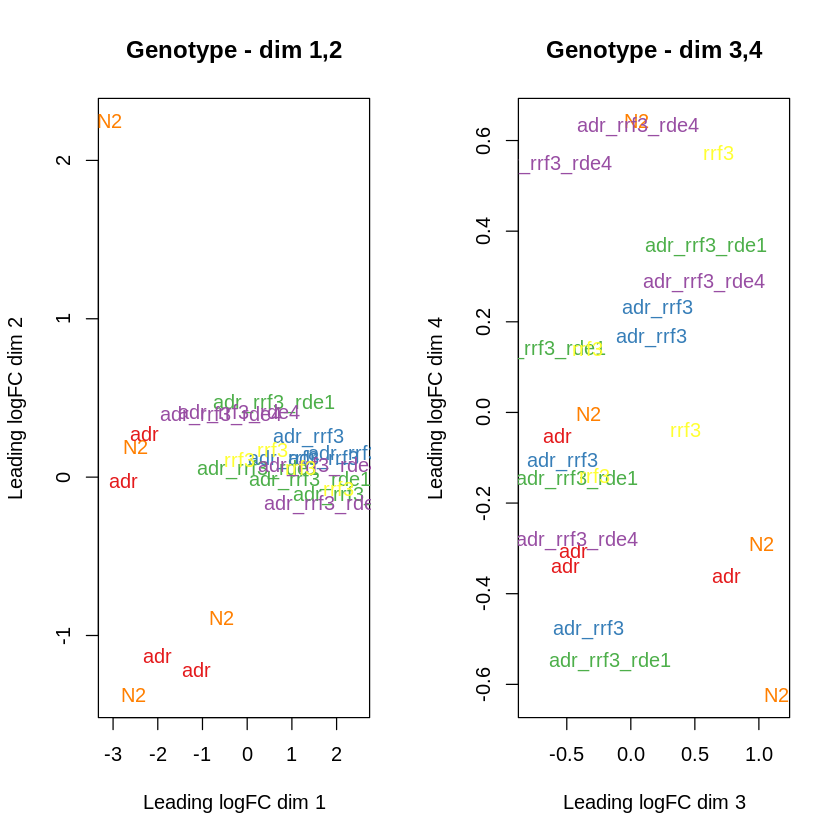

In [49]:
lcpm <- cpm(x, log=T)
par(mfrow=c(1,2))
col.group <- group
levels(col.group) <- brewer.pal(nlevels(col.group), "Set1")
col.group <- as.character(col.group)
plotMDS(lcpm, labels = group, col=col.group)
title(main="Genotype - dim 1,2")
plotMDS(lcpm, labels = group, col=col.group, dim=c(3,4))
title(main="Genotype - dim 3,4")

### Samples do not cluster great, suggesting either batch effects or other issues that add variability to the data set

In [51]:
design <- model.matrix(~0+group)
colnames(design) <- gsub("group", "", colnames(design))
design

,adr,adr_rrf3,adr_rrf3_rde1,adr_rrf3_rde4,N2,rrf3
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,0,1,0,0,0,0
10,0,1,0,0,0,0


In [53]:
contrast.matrix <- makeContrasts(
    adrvsN2 = adr - N2,
    adr_rrf3vsN2 = adr_rrf3 - N2,
    adr_rrf3_rde1vsN2 = adr_rrf3_rde1 - N2,
    adr_rrf3_rde4vsN2 = adr_rrf3_rde4 - N2,
    rrf3vsN2 = rrf3 - N2,
    levels = colnames(design)
    )

contrast.matrix

,adrvsN2,adr_rrf3vsN2,adr_rrf3_rde1vsN2,adr_rrf3_rde4vsN2,rrf3vsN2
adr,1,0,0,0,0
adr_rrf3,0,1,0,0,0
adr_rrf3_rde1,0,0,1,0,0
adr_rrf3_rde4,0,0,0,1,0
N2,-1,-1,-1,-1,-1
rrf3,0,0,0,0,1


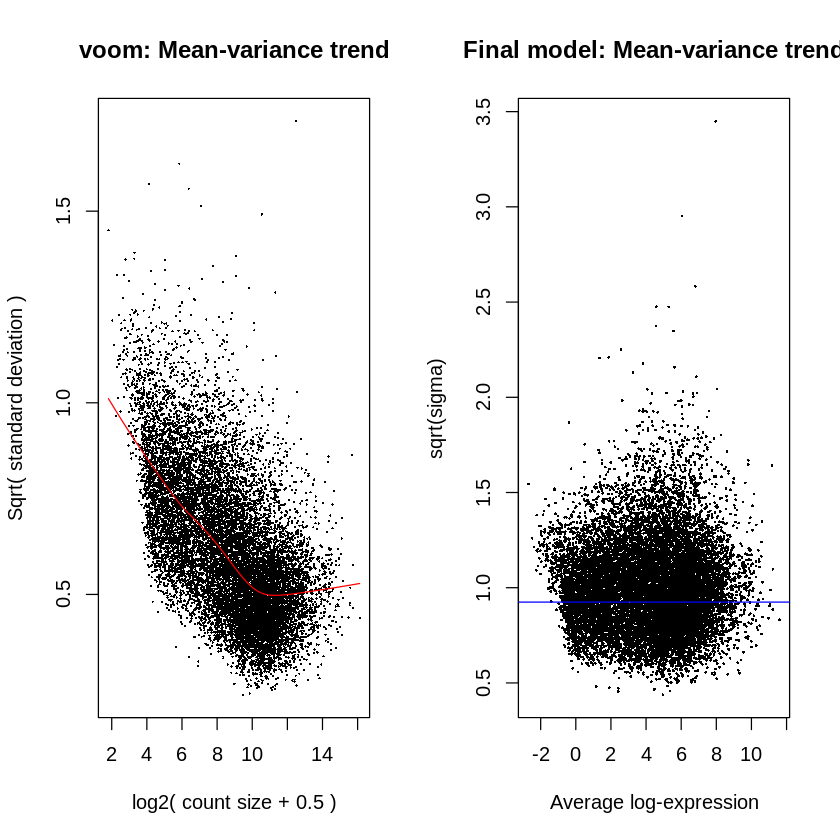

In [54]:
par(mfrow=c(1,2))
v <- voom(x, design, plot = T)
vfit <- lmFit(v, design)
vfit <- contrasts.fit(vfit, contrasts = contrast.matrix)
efit <- eBayes(vfit)
plotSA(efit)
title(main = "Final model: Mean-variance trend")

In [55]:
dt <- decideTests(efit)
summary(dt)

       adrvsN2 adr_rrf3vsN2 adr_rrf3_rde1vsN2 adr_rrf3_rde4vsN2 rrf3vsN2
Down        11         1337               292                20        6
NotSig   14751        11624             13581             14525    14494
Up           5         1806               894               222      267

In [57]:
p <- 0.05
adr.vs.N2 <- topTable(efit, coef=1,n=Inf, p.value=p)
dim(adr.vs.N2)
adr.vs.N2

[1] 16  7

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B
H15N14.1,H15N14.1,-2.9351947,5.79716279,-16.873459,5.799327e-14,4.281933e-10,17.9493672
T20H4.4,T20H4.4,-11.4563062,0.16805069,-22.831295,1.147643e-16,1.694725e-12,7.7417487
Y51F10.4,Y51F10.4,-0.8604261,5.15276434,-7.647430,1.350660e-07,3.324200e-04,7.2336837
W06A11.4,W06A11.4,1.7400060,2.01978615,8.139003,4.884703e-08,1.442648e-04,6.1156221
C53B4.6,C53B4.6,-1.0346188,3.30236628,-7.521018,1.763630e-07,3.720503e-04,6.0072429
F45H10.1,F45H10.1,-1.3895457,4.02017362,-6.702012,1.045725e-06,1.715803e-03,5.0859739
F57G4.8,F57G4.8,1.7937044,2.92611271,6.336123,2.382035e-06,3.517551e-03,3.8491167
Y48G1BL.4,Y48G1BL.4,-2.9686531,0.19980422,-8.567982,2.064391e-08,7.621214e-05,3.7548314
C08F11.7,C08F11.7,3.9776910,-0.94689968,9.617479,2.775303e-09,1.366097e-05,3.2703145
Y48G1BL.3,Y48G1BL.3,-1.3003395,3.02439944,-5.853539,7.231480e-06,9.707933e-03,3.1006543


In [60]:
adr_rrf3.vs.N2 <- topTable(efit, coef=2, n=Inf, p.value=p)
dim(adr_rrf3.vs.N2)
head(adr_rrf3.vs.N2)

[1] 3143    7

,genes,logFC,AveExpr,t,P.Value,adj.P.Val,B
Y17D7C.3,Y17D7C.3,2.421608,7.751884,21.61321,3.596531e-16,2.860269e-12,27.08752
F55C9.5,F55C9.5,4.753368,5.858527,21.06175,6.151079e-16,2.860269e-12,26.10296
F55C9.3,F55C9.3,5.361336,6.026703,20.82859,7.747732e-16,2.860269e-12,25.84786
W05H12.2,W05H12.2,2.731793,5.642858,19.84756,2.100476e-15,5.413322e-12,25.21212
F39E9.7,F39E9.7,4.444466,6.678525,19.80327,2.199494e-15,5.413322e-12,25.13273
E01G4.5,E01G4.5,4.128701,6.980000,18.11866,1.363706e-14,2.876835e-11,23.48139


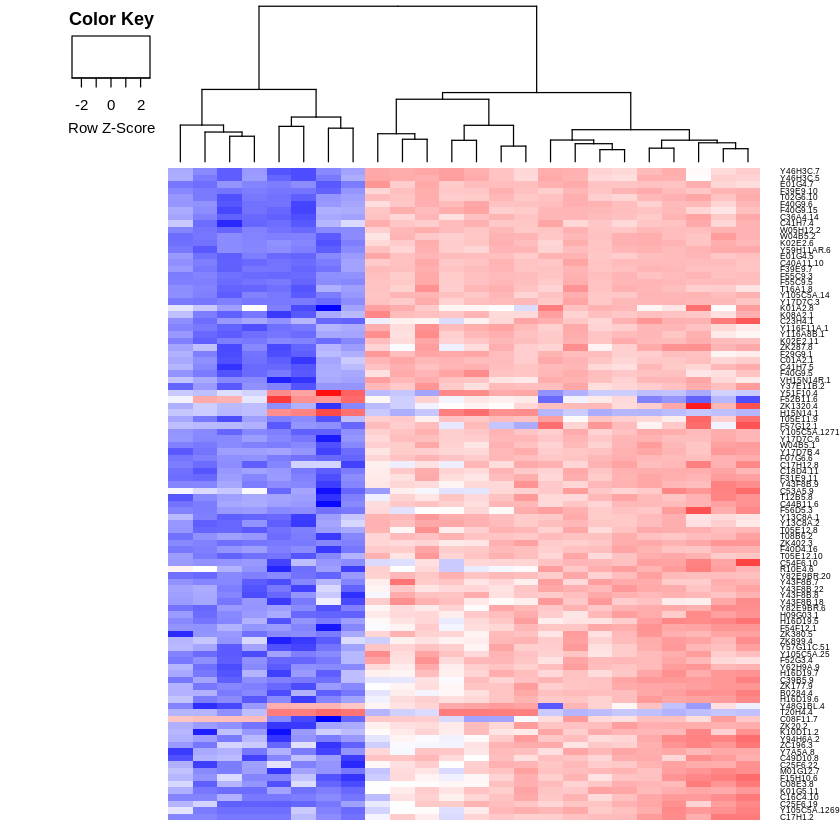

In [79]:
library(gplots)

adr_rrf3.vs.N2.top <- adr_rrf3.vs.N2$genes[1:100]

i <- which(v$genes$genes %in% adr_rrf3.vs.N2.top)
mycol <- colorpanel(1000,"blue","white","red")
heatmap.2(v$E[i,],scale = "row", labRow = v$genes$genes[i], labCol=group, col=mycol, 
          trace="none", density.info = "none", margins = c(1,4), lhei = c(1,4), lwid = c(1,4),
          dendrogram = "column",cexRow = 0.5, cexCol = 0.5, keysize = 1)

In [1]:
plotMD(efit, column=2, status=dt[,2], main=colnames(efit)[2])

ERROR: Error in plotMD(efit, column = 2, status = dt[, 2], main = colnames(efit)[2]): could not find function "plotMD"
